In [7]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import tqdm
import math
%matplotlib inline

# Загружаем датасет

In [2]:
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

NameError: name 'pickle' is not defined

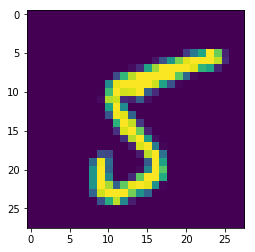

In [9]:
# Пример, как можно визуализировать данные
plt.imshow(train['data'][0].reshape(28,28))

# Обучаем модель

In [35]:
# отнормируем данные

x = train['data'] / 255
y = train['labels']
y[y == 5] = -1
y[y == 6] = 1

In [52]:
# разобьем данные на обучающее и тестирующие множество. Всего 10к картинок, поделим множетсво в соотношении 9:1, чтобы 
# сберечь данные для обучения модели.

x_train = x.copy()[:9000]
y_train = y.copy()[:9000]
x_test = x.copy()[9000:]
y_test = y.copy()[9000:]

# добавим в обучающее и тестирующее множество единичную колонку

x_train = np.hstack([ np.ones((x_train.shape[0], 1)), x_train] )
x_test = np.hstack([ np.ones((x_test.shape[0], 1)), x_test] )

In [53]:
# зададим случайные веса 

np.random.seed(11)
w = np.random.normal(scale=0.00001, size = x_train.shape[1])


In [54]:
# Объявим функцию Loss
 
def loss(data, labels, w):
    num = 0
    for j in range(data.shape[0]):
        num += math.log(1 + math.exp(- labels[j] * np.dot(w.T, data[j])))
    return num

In [55]:
# Объявим функцию ACC

def acc(data, labels, w):
    cnt = 0
    for j in range(data.shape[0]):
        p = 1 / (1 + math.exp(- np.dot(w.T, data[j])))
        if ((labels[j] == 1) & (p >= 0.5)) or ((labels[j] == -1) & (p < 0.5)):
            cnt += 1
    return cnt/data.shape[0]
        

In [56]:
# обучим модель на тренировочном множестве

loss_train = np.zeros(300)
loss_test = np.zeros(300)
acc_train = np.zeros(300)
acc_test = np.zeros(300)
for iter in tqdm.tqdm_notebook(range(300)):
    for i in range(x_train.shape[0]):
        j = np.random.randint(0, x_train.shape[0])
        grad = - y_train[j] * x_train[j] / ( 1 + math.exp( y_train[j] * np.dot(w.T, x_train[j]) ) ) + 0 * w
        w = w - 0.0004 * grad
        
    loss_train[iter] = loss(x_train, y_train, w)
    loss_test[iter] = loss(x_test, y_test, w)
    acc_train[iter] = acc(x_train, y_train, w)
    acc_test[iter] = acc(x_test, y_test, w)
    

# Оцениваем результат

Обязательно отрисуйте 2 графика:
- loss на обучающем и тестовом множесте
- % правильно классифицированных примеров на тестовом и обучающем множестве

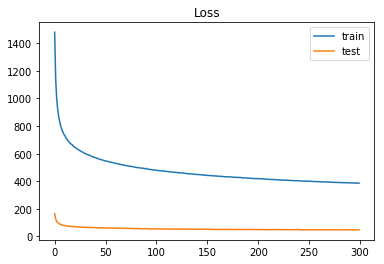

In [57]:
# Построим график Loss 
plt.title('Loss')
plt.plot(loss_train, label='train')
plt.plot(loss_test, label='test')
plt.legend();

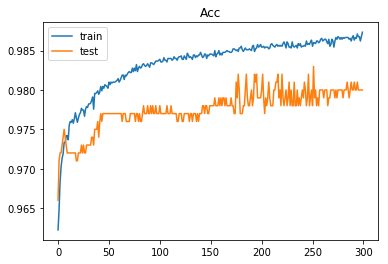

In [58]:
# Построим график ACC
plt.title('Acc')
plt.plot(acc_train, label='train')
plt.plot(acc_test, label='test')
plt.legend()

# Сохраняем данные для кагла

https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528

Результат записывается в простой текстовый файл. Первая строчка "Id,Prediction", далее для каждого примера из валидационного множества записывается его Id (порядковый номер, с нуля) и вероятность принадлежности к классу '6', например '123,0.12'.

Важно соблюдать тот же порядок следования элементов, что и в наборе данных. Нумерация id с 0

In [41]:
X = test_no_lables['data']
X = X / 255
X = np.hstack([ np.ones((X.shape[0], 1)), X] )
Y_pred = np.zeros(X.shape[0])
# compute Y_pred
for j in range(X.shape[0]):
    Y_pred[j] = 1/(1+math.exp(- np.dot(w.T, X[j])))

with open('solution.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(X.shape[0]):
        print(i, Y_pred[i], sep=',', file=fout)

# Сдача

1. Регистрируетесь на конкурс https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528 
1. Преодолеваете "Pass level" baseline
1. После того, как вы преодолеете baseline, присылайте ноутбук с решение по адресу **voropaev@corp.mail.ru**

# Внимание
- Пишите тему письм в формате "[МИФИ][1] Фамилия"
- Внутри писма прикрепляете файл ноутбука с именем family.ipynb
- Обязательно указывайте ваш ник на kaggle